In [67]:
import sys
import os

repo_root = os.path.abspath(os.path.join(os.path.dirname(os.getcwd())))
sys.path.append(repo_root)

print(repo_root)

/home/jackyeung99/classes/class_financial-econometrics


In [68]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import math 
import numpy as np
import pandas as pd
import random
from pandas_datareader import data as pdr
from scipy.signal import welch

In [69]:
def power_transfer(lambda_vals):
    return 4*(np.sin(2*lambda_vals)**2)

In [70]:

lambdas = np.linspace(-math.pi, math.pi, 1000, endpoint=False)

/tmp/ipykernel_1581/3332878018.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


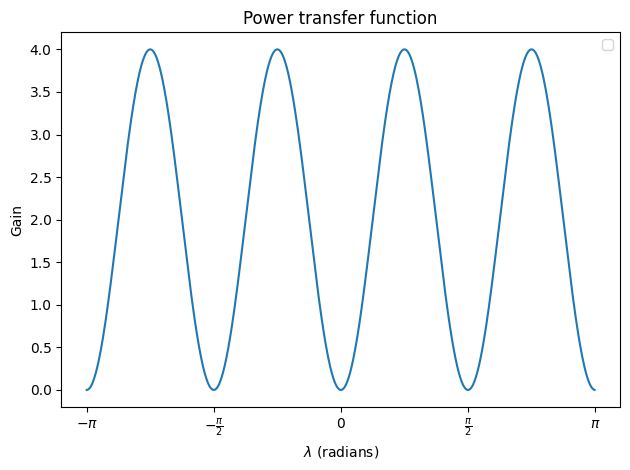

In [71]:

H = power_transfer(lambdas)
plt.plot(lambdas, H)

plt.title("Power transfer function")

ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$",
               r"$\frac{\pi}{2}$", r"$\pi$"]
plt.xticks(ticks, tick_labels)

plt.xlabel(r"$\lambda$ (radians)")
plt.ylabel("Gain")
plt.legend()
plt.tight_layout()

plt.savefig('../Figures/Assignment03/power_transfer.png', dpi = 300)

In [72]:
gdp_pc = pdr.DataReader('A939RX0Q048SBEA', 'fred', start='1980-01-01')
gdp_pc['log'] = np.log(gdp_pc['A939RX0Q048SBEA'])
gdp_pc['QGR'] = gdp_pc['log'].diff(1)
gdp_pc['YGR'] = gdp_pc['log'].diff(4)

gdp_pc.reset_index()


,DATE,A939RX0Q048SBEA,log,QGR,YGR
0,1980-01-01,32377,10.385204,NaN,NaN
1,1980-04-01,31621,10.361577,-0.023627,NaN
2,1980-07-01,31489,10.357394,-0.004183,NaN
3,1980-10-01,31990,10.373179,0.015785,NaN
4,1981-01-01,32550,10.390533,0.017354,0.005329
...,...,...,...,...,...
177,2024-04-01,68320,11.131958,0.004974,0.020331
178,2024-07-01,68696,11.137446,0.005488,0.017578
179,2024-10-01,69006,11.141949,0.004502,0.016776
180,2025-01-01,68833,11.139439,-0.002510,0.012455


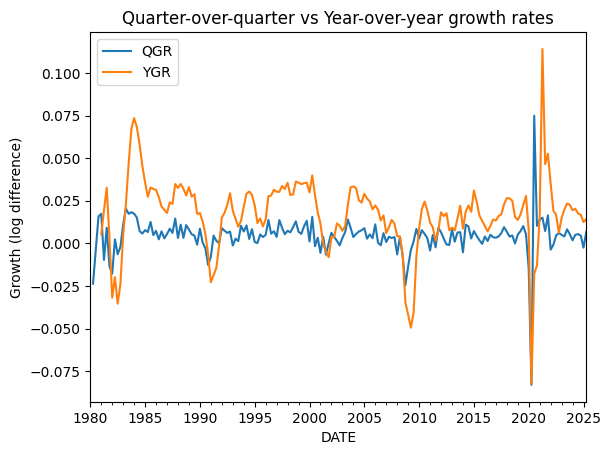

In [73]:
gdp_pc[['QGR','YGR']].plot(title="Quarter-over-quarter vs Year-over-year growth rates")
plt.ylabel("Growth (log difference)")
plt.savefig('../Figures/Assignment03/gdp.png', dpi = 300)
plt.show()

/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 181, using nperseg = 181
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,
/home/jackyeung99/classes/class_financial-econometrics/.venv/lib/python3.10/site-packages/scipy/signal/_spectral_py.py:790: UserWarning: nperseg = 256 is greater than input length  = 178, using nperseg = 178
  freqs, _, Pxy = _spectral_helper(x, y, fs, window, nperseg, noverlap,


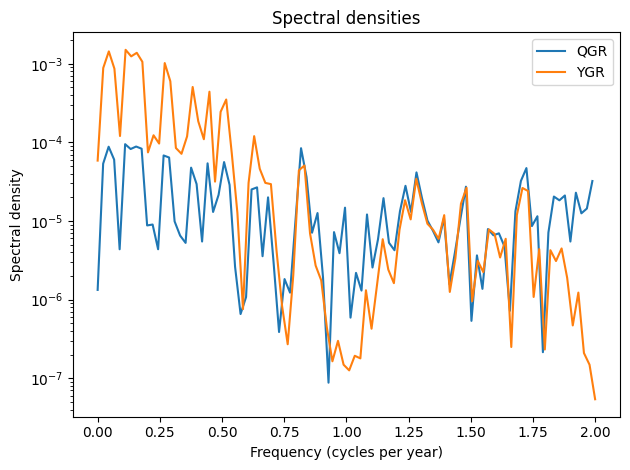

In [74]:

fs = 4

fq_QGR, Pxx_QGR = welch(gdp_pc['QGR'].dropna(), fs=fs)
fq_YGR, Pxx_YGR = welch(gdp_pc['YGR'].dropna(), fs=fs)

plt.semilogy(fq_QGR, Pxx_QGR, label='QGR')
plt.semilogy(fq_YGR, Pxx_YGR, label='YGR')
plt.title("Spectral densities")
plt.xlabel("Frequency (cycles per year)")
plt.ylabel("Spectral density")
plt.legend()
plt.tight_layout()

plt.savefig('../Figures/Assignment03/spectral_density.png', dpi = 300)
plt.show()

In [75]:
def power_transfer_2(lambda_vals, K):

    inner = 1 / (2*K + 1)**2 

    outer = np.sin((2*K + 1) * lambda_vals * .5) / np.sin(lambda_vals * .5)

    return inner * (outer **2)

/tmp/ipykernel_1581/2303767632.py:5: RuntimeWarning: invalid value encountered in divide
  outer = np.sin((2*K + 1) * lambda_vals * .5) / np.sin(lambda_vals * .5)


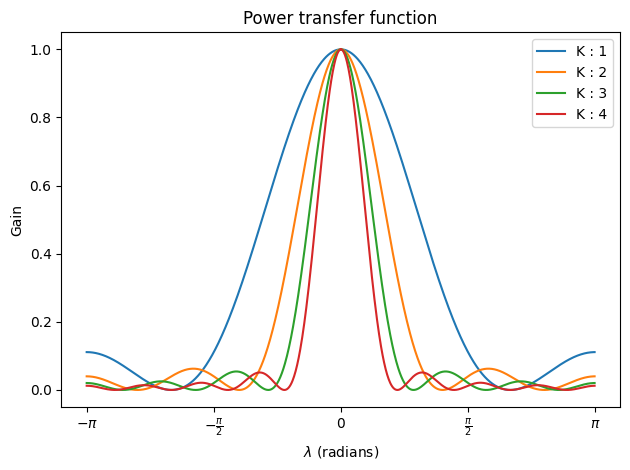

In [76]:
for k in [1,2,3,4]:
    H = power_transfer_2(lambdas, k)
    plt.plot(lambdas, H, label = f"K : {k}")

plt.title("Power transfer function")

ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
tick_labels = [r"$-\pi$", r"$-\frac{\pi}{2}$", r"$0$",
               r"$\frac{\pi}{2}$", r"$\pi$"]
plt.xticks(ticks, tick_labels)

plt.xlabel(r"$\lambda$ (radians)")
plt.ylabel("Gain")
plt.legend()
plt.tight_layout()

plt.savefig('../Figures/Assignment03/power_transfer_2.png', dpi = 300)

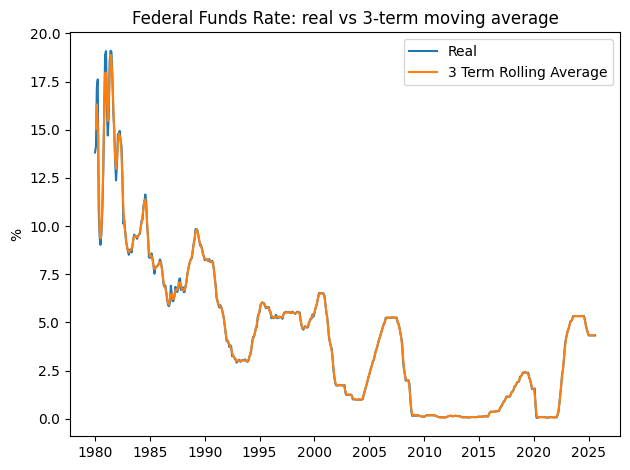

In [77]:
x = pdr.DataReader('FEDFUNDS', 'fred', start='1980-01-01').dropna().rename(columns={'FEDFUNDS':'x'}).reset_index()
x['y'] = x['x'].rolling(window=3, center=True).mean()

plt.plot(x['DATE'], x['x'], label='Real')
plt.plot(x['DATE'], x['y'], label='3 Term Rolling Average')
plt.title('Federal Funds Rate: real vs 3-term moving average')
plt.ylabel('%')
plt.tight_layout()
plt.legend()
plt.savefig('../Figures/Assignment03/time_series_2.png', dpi = 300)

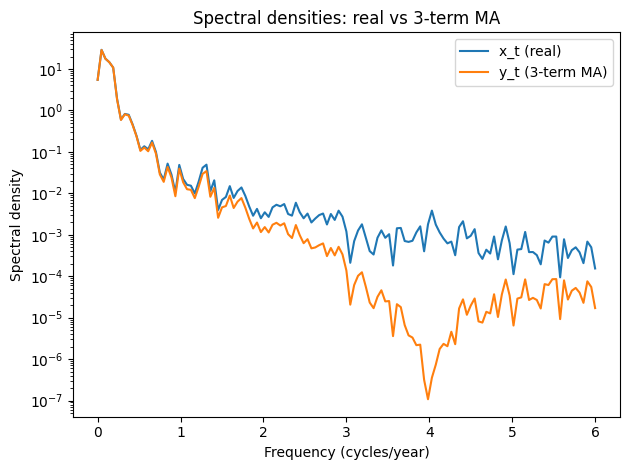

In [78]:

fs = 12 
fq, Sx = welch(x['x'].dropna(), fs=fs, nperseg=256)
fq, Sy = welch(x['y'].dropna(), fs=fs, nperseg=256)

plt.semilogy(fq, Sx, label='x_t (real)')
plt.semilogy(fq, Sy, label='y_t (3-term MA)')
plt.xlabel('Frequency (cycles/year)')
plt.ylabel('Spectral density')
plt.title('Spectral densities: real vs 3-term MA')
plt.legend()
plt.tight_layout()
plt.savefig('../Figures/Assignment03/spectral_density_2.png', dpi = 300)